In [2]:
import igraph as ig
import utils
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
import itertools
from statistics import mean

In [3]:
g = ig.Graph.Read('../../data/graphs/april2022.graphml')

In [3]:
station = "MILANO CENTRALE"

In [4]:
VISUAL_STYLE = {
    'layout': utils.layout_geo(g),
    'bbox': (0, 0, 1500, 1500) 
}

In [5]:
g_L_space = ig.Graph(directed=False)
g_L_space.add_vertices(
    n=g.vs['name'],
    attributes={
        'label': g.vs['label'],
        'lat': g.vs['lat'],
        'lon': g.vs['lon']
    }
)

for a, b in itertools.permutations(g.vs, 2):
    edges = g.es.select(_source=a.index, _target=b.index)
    if len(edges) > 0:
        g_L_space.add_edge(
            source=a.index,
            target=b.index,
            time_second=mean([e['time_second'] for e in edges]),
            num_train=sum([e['num_train'] for e in edges])
        )


In [6]:
#return true if a graph has a node
def has_node(graph, name):
    try:
        graph.vs.find(label=name)
    except:
        return False
    return True

## Network centric

In [7]:
#to undirected
partition_louvain = g_L_space.community_multilevel()
partition_eigen = g_L_space.community_leading_eigenvector()

In [8]:
#extract community with MILANO CENTRALE
for i in range(len(partition_louvain)):
    if has_node(partition_louvain.subgraph(i), station):
        sub_louvain = partition_louvain.subgraph(i)
for i in range(len(partition_eigen)):
    if has_node(partition_eigen.subgraph(i), station):
        sub_eigen = partition_eigen.subgraph(i)

In [9]:
#ig.plot(sub_louvain,**VISUAL_STYLE)

In [10]:
#ig.plot(sub_eigen,**VISUAL_STYLE)

In [11]:
#extract name of vertex
eigen_v = []
louvain_v = []
for i in range(len(sub_eigen.vs)):
    eigen_v.append(sub_eigen.vs[i]['label'])

for i in range(len(sub_louvain.vs)):
    louvain_v.append(sub_louvain.vs[i]['label'])


In [12]:
#find intersection and trim the graphs
#intersection = list(set(eigen_v).intersection(louvain_v))
#trim_eigen_v = [v for v in eigen_v if v not in intersection]
#trim_louvain_v = [v for v in louvain_v if v not in intersection]
#intersection

In [13]:
#for i in range(len(sub_eigen.vs)):
#    if sub_eigen.vs[i]['label'] in intersection:
#        sub_eigen.vs[i]['color'] = 'red'
#    else:
#        sub_eigen.vs[i]['color'] = 'blue'

#for i in range(len(sub_louvain.vs)):
#    if sub_louvain.vs[i]['label'] in intersection:
#        sub_louvain.vs[i]['color'] = 'red'
#    else:
#        sub_louvain.vs[i]['color'] = 'blue'

In [14]:
#ig.plot(sub_louvain, **VISUAL_STYLE)

In [15]:
#ig.plot(sub_eigen, **VISUAL_STYLE)

## Divisive Hierarchical Approaches

In [16]:
dendrogram = g_L_space.community_edge_betweenness(clusters=None)
#ig.plot(dendrogram)
dendrogram.summary()

'Dendrogram, 428 elements, 427 merges'

In [17]:
dendrogram.optimal_count

12

In [18]:
#clustering wirth edge betw
partition_edge_betw = dendrogram.as_clustering()
print(len(partition_edge_betw))

12


In [19]:
#skip
#partition_edge_betw.modularity
#partition_edge_betw.summary()
#g.vs['label'] = partition_edge_betw.membership
#ig.plot(partition_edge_betw)

#dendrogram_cut_2 = g.community_edge_betweenness(clusters=3)
#print(dendrogram_cut_2.as_clustering())

#partition_edge_betw_cut_2 = dendrogram_cut_2.as_clustering()

#g.vs['label'] = partition_edge_betw_cut_2.membership
#ig.plot(partition_edge_betw_cut_2)

In [20]:
#find subgraph with MILANO CENTRALE
for i in range(len(partition_edge_betw)):
    if has_node(partition_edge_betw.subgraph(i), station):
        sub_betw = partition_edge_betw.subgraph(i)

In [21]:
#extract names of vertex
edge_betw_v = []
for i in range(len(sub_betw.vs)):
    edge_betw_v.append(sub_betw.vs[i]['label'])

In [22]:
#ig.plot(sub_betw)

In [23]:
#find intersection and trim the graphs
all_inter = [v for v in eigen_v if v in louvain_v and v in edge_betw_v]
eigen_louv_inter = [v for v in eigen_v if v in louvain_v and v not in edge_betw_v]
eigen_edge_inter = [v for v in eigen_v if v not in louvain_v and v in edge_betw_v]
louv_edge_inter = [v for v in louvain_v if v in edge_betw_v and v not in eigen_v]
eigen_trim = [v for v in eigen_v if v not in louvain_v and v not in edge_betw_v]
louvain_trim = [v for v in louvain_v if v not in eigen_v and v not in edge_betw_v]
edge_trim = [v for v in edge_betw_v if v not in eigen_v and v not in louvain_v]

<function matplotlib.pyplot.show(close=None, block=None)>

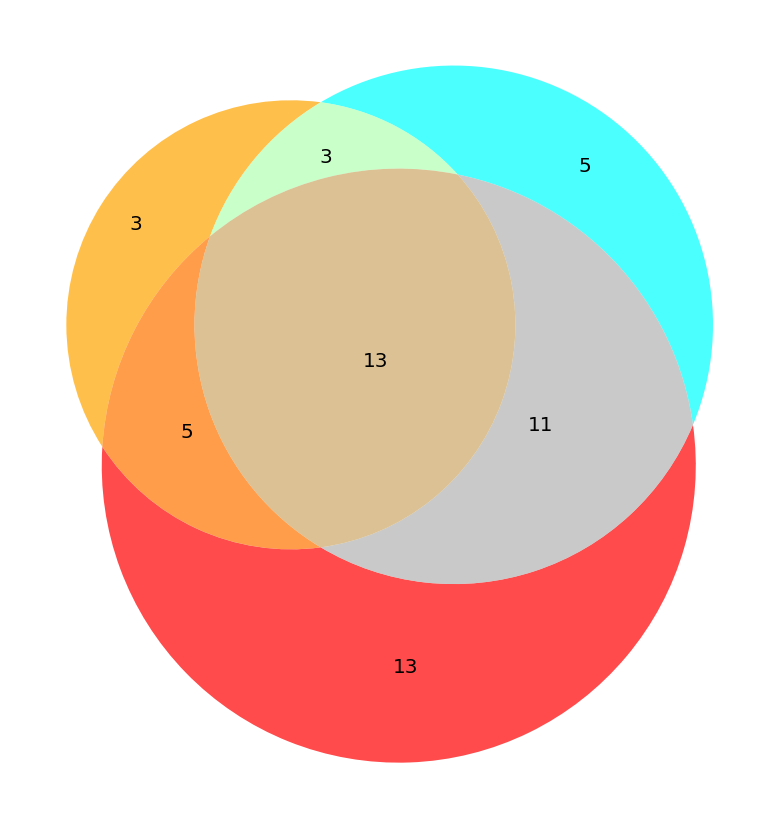

In [24]:
plt.figure(figsize=(15,15))
venn_num = venn3(subsets=(len(eigen_trim),len(louvain_trim),len(eigen_louv_inter),len(edge_trim),len(eigen_edge_inter),len(louv_edge_inter),len(all_inter)), 
      set_labels=('Eigen', 'Louvain', 'Edge Betw'), 
      set_colors=("orange", "cyan", "red"), alpha=0.7)

for text in venn_num.set_labels:
    text.set_fontsize(14)
    text.set_color("white")
for text in venn_num.subset_labels:
    text.set_fontsize(20)

plt.show

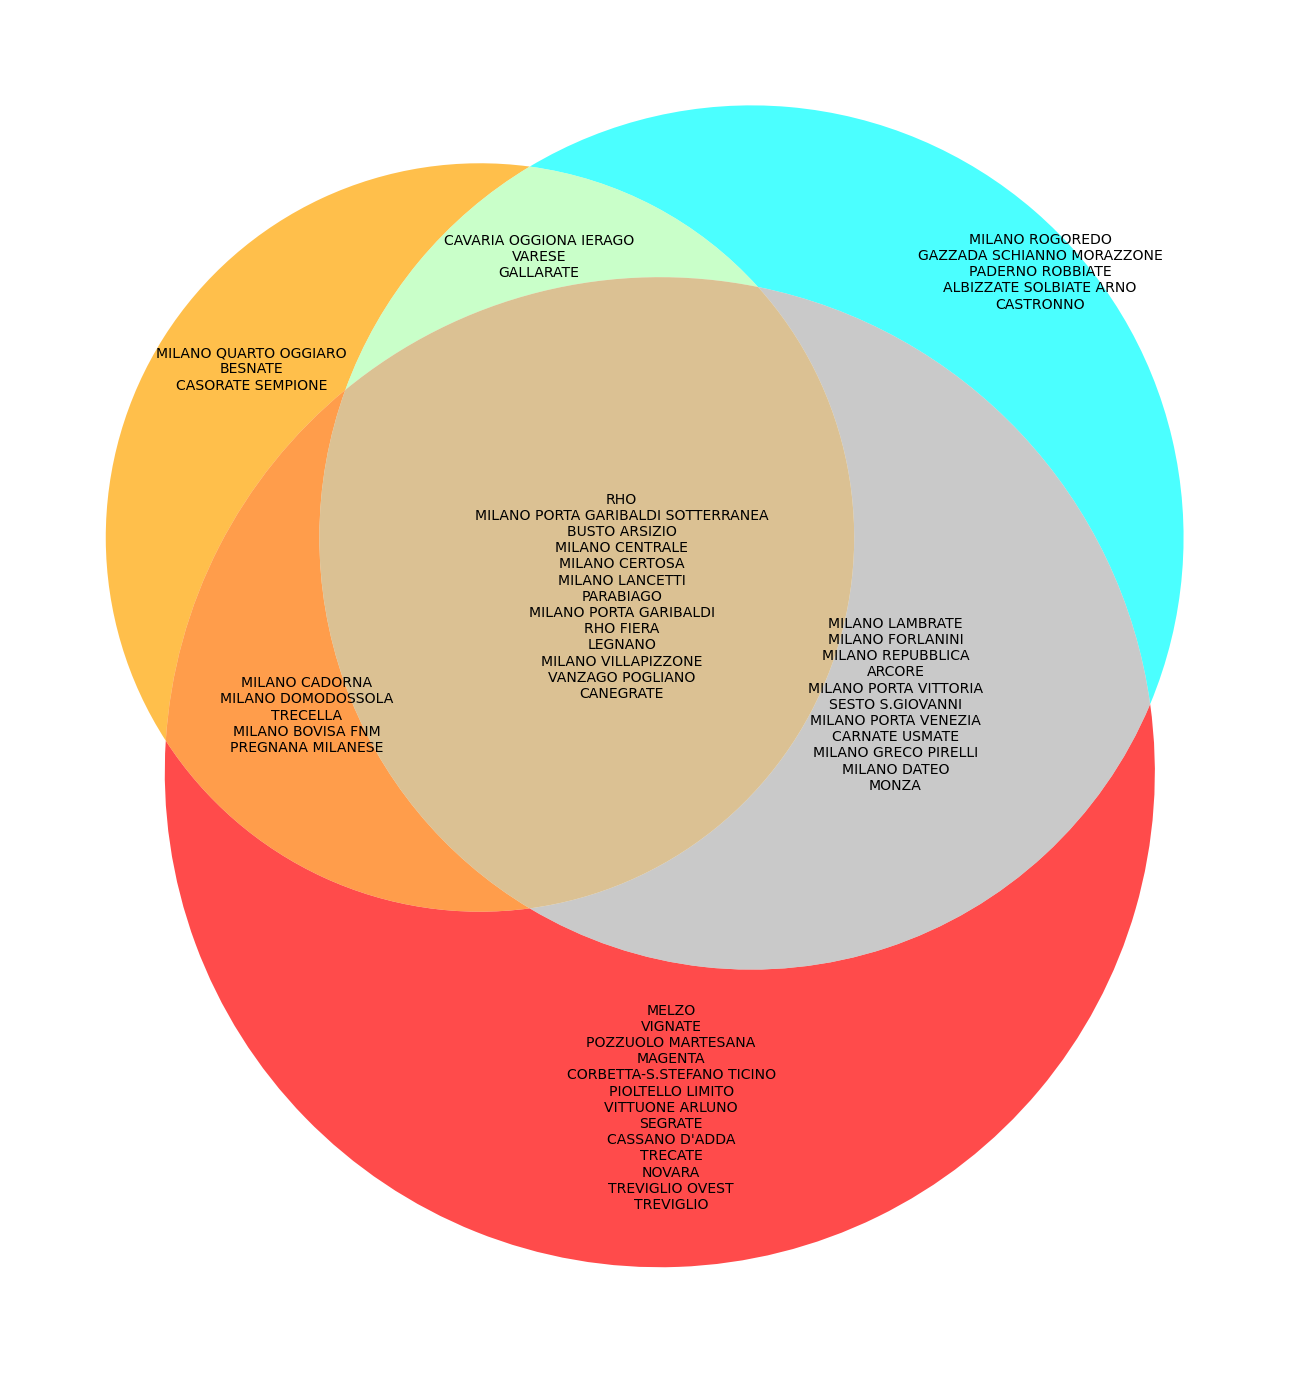

In [25]:
#sets
set1 = set(eigen_v)
set2 = set(louvain_v)
set3 = set(edge_betw_v)
#venn diagrams
plt.figure(figsize=(25,25))
venn = venn3(subsets=(set1, set2, set3), 
      set_labels=('Eigen', 'Louvain', 'Edge Betw'), 
      set_colors=("orange", "cyan", "red"), alpha=0.7)

venn.get_label_by_id('100').set_text('\n'.join(set1-set2-set3))
venn.get_label_by_id('110').set_text('\n'.join(set1&set2-set3))
venn.get_label_by_id('010').set_text('\n'.join(set2-set3-set1))
venn.get_label_by_id('101').set_text('\n'.join(set1&set3-set2))
venn.get_label_by_id('111').set_text('\n'.join(set1&set2&set3))
venn.get_label_by_id('011').set_text('\n'.join(set2&set3-set1))
venn.get_label_by_id('001').set_text('\n'.join(set3-set2-set1))

for text in venn.set_labels:
    text.set_fontsize(14)
    text.set_color("white")
for text in venn.subset_labels:
    text.set_fontsize(14)

venn.get_label_by_id("100").set_x(-0.4)
venn.get_label_by_id("010").set_x(0.4)

plt.show()